## Library import + definition of the network


In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from library_2GMM import*

class TwoLayerDenoiser(nn.Module):
    def __init__(self, n, hidden_dim=256, L=3):
        super(TwoLayerDenoiser, self).__init__()
        self.lin0 = nn.Linear(42, L)                  # Time embedding φ → s
        self.lin1 = nn.Linear(n, hidden_dim)          # Input projection x → x1
        self.lin2 = nn.Linear(hidden_dim * L, n)      # Output projection

    def forward(self, x, alpha):
        batch_size = x.shape[0]
        alpha = alpha.unsqueeze(1)

        i_values = torch.arange(21, dtype=torch.float32, device=x.device)
        phi = torch.cat([torch.cos(alpha * i_values), torch.sin(alpha * i_values)], dim=1)

        s = self.lin0(phi)
        x1 = F.tanh(self.lin1(x))

        outer_product = torch.einsum("bi,bj->bij", s, x1)  # Shape: (B, L, hidden_dim)
        x2 = outer_product.view(batch_size, -1)

        x_out = self.lin2(x2) + torch.cos(alpha).pow(2) * x
        return x_out


# Study of the RELU network in different scenarios

In [7]:
n = 128
p = 0.7
a = np.ones(n)

# 1st setting
samples = 5000,
epochs = 500,
hidden_dim = 256,
L = 3


In [8]:
num_samples = 5000
epochs = 500
hidden_dim = 256
L = 3

samples = construct_dataset(n, p, a, num_samples)

denoiser1 = TwoLayerDenoiser(n)

training(denoiser1, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)


Epoch [1/500] | Train Loss: 0.5739 | Val Loss: 61.6973% | 
Epoch [51/500] | Train Loss: 0.5281 | Val Loss: 60.7984% | 
Epoch [101/500] | Train Loss: 0.5310 | Val Loss: 61.1031% | 
Epoch [151/500] | Train Loss: 0.5219 | Val Loss: 58.9274% | 
Epoch [201/500] | Train Loss: 0.5201 | Val Loss: 61.1228% | 
Epoch [251/500] | Train Loss: 0.5378 | Val Loss: 60.8569% | 
Epoch [301/500] | Train Loss: 0.5397 | Val Loss: 59.8399% | 
Epoch [351/500] | Train Loss: 0.5297 | Val Loss: 60.7598% | 
Epoch [401/500] | Train Loss: 0.5295 | Val Loss: 60.3825% | 
Epoch [451/500] | Train Loss: 0.5274 | Val Loss: 61.2579% | 
Loaded best model with validation loss: 58.4090%


0

# 2nd setting

In [9]:
num_samples = 20000
epochs = 500
hidden_dim = 256
L = 3
K = 200

samples = construct_dataset(n, p, a, num_samples)

denoiser2 = TwoLayerDenoiser(n)

training(denoiser2, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)


Epoch [1/500] | Train Loss: 0.5438 | Val Loss: 60.6902% | 
Epoch [51/500] | Train Loss: 0.5350 | Val Loss: 59.5356% | 
Epoch [101/500] | Train Loss: 0.5264 | Val Loss: 60.6148% | 
Epoch [151/500] | Train Loss: 0.5247 | Val Loss: 59.5712% | 
Epoch [201/500] | Train Loss: 0.5228 | Val Loss: 59.8452% | 
Epoch [251/500] | Train Loss: 0.5338 | Val Loss: 59.6396% | 
Epoch [301/500] | Train Loss: 0.5342 | Val Loss: 59.8770% | 
Epoch [351/500] | Train Loss: 0.5347 | Val Loss: 59.5075% | 
Epoch [401/500] | Train Loss: 0.5267 | Val Loss: 59.5603% | 
Epoch [451/500] | Train Loss: 0.5290 | Val Loss: 60.2248% | 
Loaded best model with validation loss: 58.9636%


0

In [10]:
#torch.save(denoiser2.state_dict(), 'nn params/denoiser_tanh_weights_prova.pth')
denoiser2.load_state_dict(torch.load('nn params/denoiser_tanh_weights_prova.pth'))
denoiser2.eval()


/var/folders/2c/01bhfspx2hj56fb5ryg654lr0000gn/T/ipykernel_61016/958320497.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  denoiser2.load_state_dict(torch.load('nn param

TwoLayerDenoiser(
  (lin0): Linear(in_features=42, out_features=3, bias=True)
  (lin1): Linear(in_features=128, out_features=256, bias=True)
  (lin2): Linear(in_features=768, out_features=128, bias=True)
)

# 3rd setting 

In [11]:
num_samples = 20000
epochs = 2000
hidden_dim = 256
L = 3
K = 200
alpha_max = np.pi/2-0.2

samples = construct_dataset(n, p, a, num_samples)

denoiser3 = TwoLayerDenoiser(n)

training(denoiser3, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)


Epoch [1/2000] | Train Loss: 0.5476 | Val Loss: 60.1334% | 
Epoch [51/2000] | Train Loss: 0.5298 | Val Loss: 60.3010% | 
Epoch [101/2000] | Train Loss: 0.5277 | Val Loss: 60.0110% | 
Epoch [151/2000] | Train Loss: 0.5284 | Val Loss: 60.3560% | 
Epoch [201/2000] | Train Loss: 0.5301 | Val Loss: 60.0721% | 
Epoch [251/2000] | Train Loss: 0.5284 | Val Loss: 60.1437% | 
Epoch [301/2000] | Train Loss: 0.5316 | Val Loss: 59.6998% | 
Epoch [351/2000] | Train Loss: 0.5255 | Val Loss: 59.7210% | 
Epoch [401/2000] | Train Loss: 0.5317 | Val Loss: 60.0844% | 
Epoch [451/2000] | Train Loss: 0.5335 | Val Loss: 59.7714% | 
Epoch [501/2000] | Train Loss: 0.5331 | Val Loss: 60.1414% | 
Epoch [551/2000] | Train Loss: 0.5332 | Val Loss: 60.0284% | 
Epoch [601/2000] | Train Loss: 0.5261 | Val Loss: 60.4497% | 
Epoch [651/2000] | Train Loss: 0.5304 | Val Loss: 59.5974% | 
Epoch [701/2000] | Train Loss: 0.5259 | Val Loss: 59.6672% | 
Epoch [751/2000] | Train Loss: 0.5281 | Val Loss: 59.8171% | 
Epoch [801/

0

# 4th setting

In [12]:
num_samples = 20000
epochs = 2000
hidden_dim = 512
L = 6
K = 200
alpha_max = np.pi/2-0.2

samples = construct_dataset(n, p, a, num_samples)

denoiser4 = TwoLayerDenoiser(n)

training(denoiser4, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)

Epoch [1/2000] | Train Loss: 0.5455 | Val Loss: 60.5590% | 
Epoch [51/2000] | Train Loss: 0.5259 | Val Loss: 59.4638% | 
Epoch [101/2000] | Train Loss: 0.5281 | Val Loss: 59.9098% | 
Epoch [151/2000] | Train Loss: 0.5279 | Val Loss: 59.8439% | 
Epoch [201/2000] | Train Loss: 0.5297 | Val Loss: 60.1219% | 
Epoch [251/2000] | Train Loss: 0.5334 | Val Loss: 60.3976% | 
Epoch [301/2000] | Train Loss: 0.5296 | Val Loss: 60.2605% | 
Epoch [351/2000] | Train Loss: 0.5371 | Val Loss: 59.9788% | 
Epoch [401/2000] | Train Loss: 0.5288 | Val Loss: 59.4446% | 
Epoch [451/2000] | Train Loss: 0.5339 | Val Loss: 59.4717% | 
Epoch [501/2000] | Train Loss: 0.5252 | Val Loss: 60.3241% | 
Epoch [551/2000] | Train Loss: 0.5338 | Val Loss: 59.9827% | 
Epoch [601/2000] | Train Loss: 0.5343 | Val Loss: 60.2035% | 
Epoch [651/2000] | Train Loss: 0.5355 | Val Loss: 59.8522% | 
Epoch [701/2000] | Train Loss: 0.5384 | Val Loss: 59.9480% | 
Epoch [751/2000] | Train Loss: 0.5322 | Val Loss: 59.8111% | 
Epoch [801/

0

T max: 99.33


/Users/edotarci/Desktop/eth/2nd sem/semester project/codes april/library_2GMM.py:154: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_samples = target_samples + delta_t * drift + torch.sqrt(torch.tensor(delta_t)) * noise


T max: 99.33
T max: 99.33
T max: 99.33


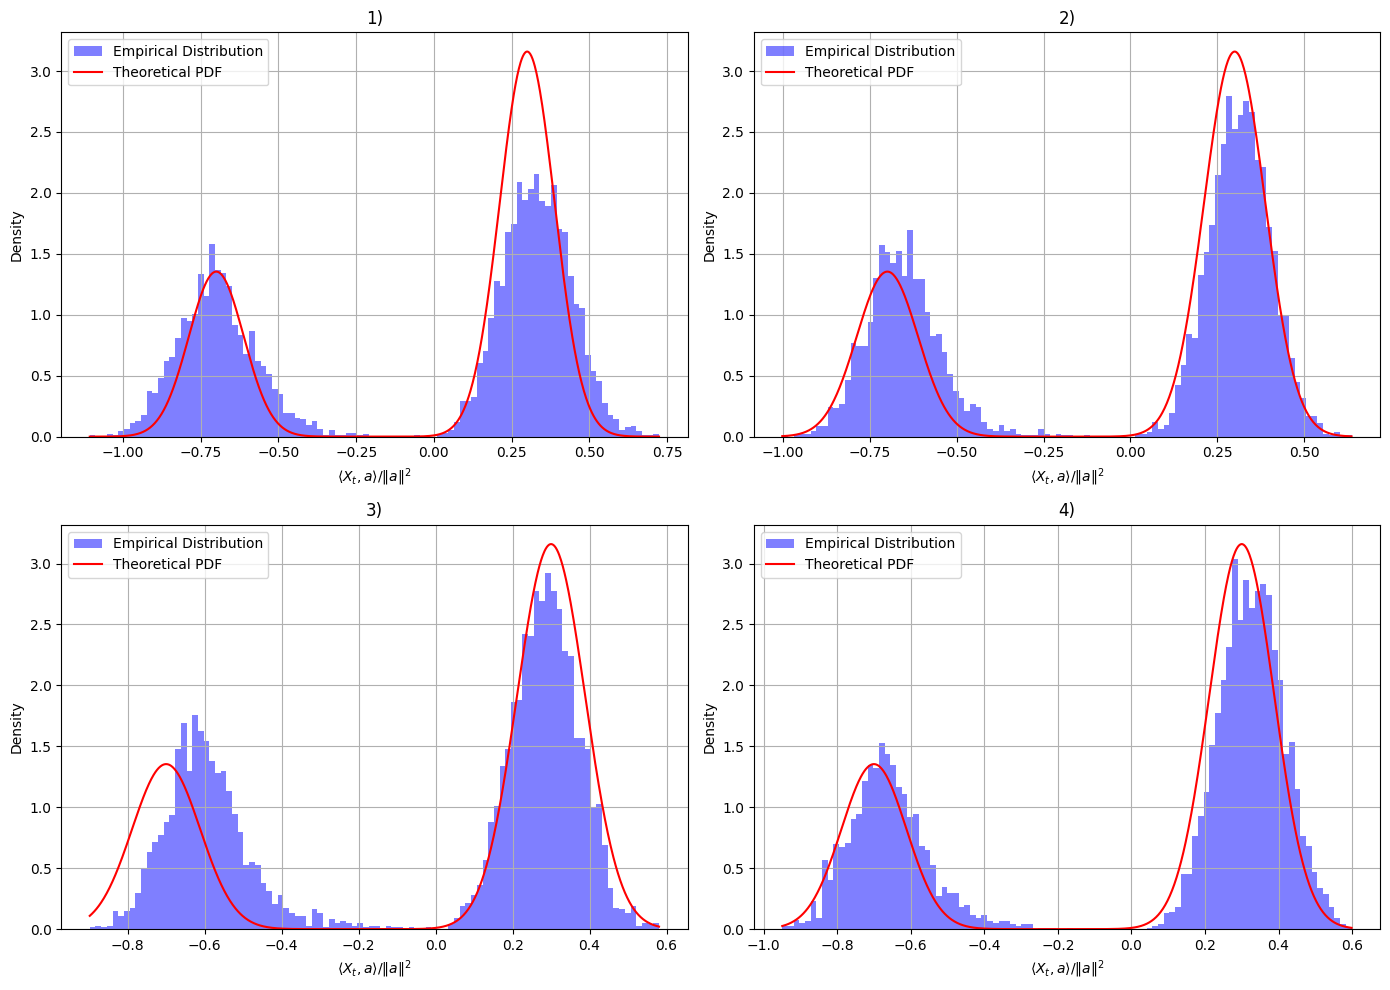

In [13]:
alpha_max = np.pi/2-0.1
K = 200

# Assume you've already created these with different seeds/models
target_samples1 = forward_sampling(alpha_max, K, denoiser1, n, num_samples_target=5000, path=False)
target_samples2 = forward_sampling(alpha_max, K, denoiser2, n, num_samples_target=5000, path=False)
target_samples3 = forward_sampling(alpha_max, K, denoiser3, n, num_samples_target=5000, path=False)
target_samples4 = forward_sampling(alpha_max, K, denoiser4, n, num_samples_target=5000, path=False)


datasets = [target_samples1, target_samples2, target_samples3, target_samples4]
titles = ["1)", "2)", "3)", "4)"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, samples in enumerate(datasets):
    plot_projected_dataset(samples, a, p, n, ax=axes[i])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()


# Comparison with the true conditional mean
using setting 2

T max: 99.33
1


/Users/edotarci/Desktop/eth/2nd sem/semester project/codes april/library_2GMM.py:253: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  samples = torch.tensor(samples, dtype=torch.float32)


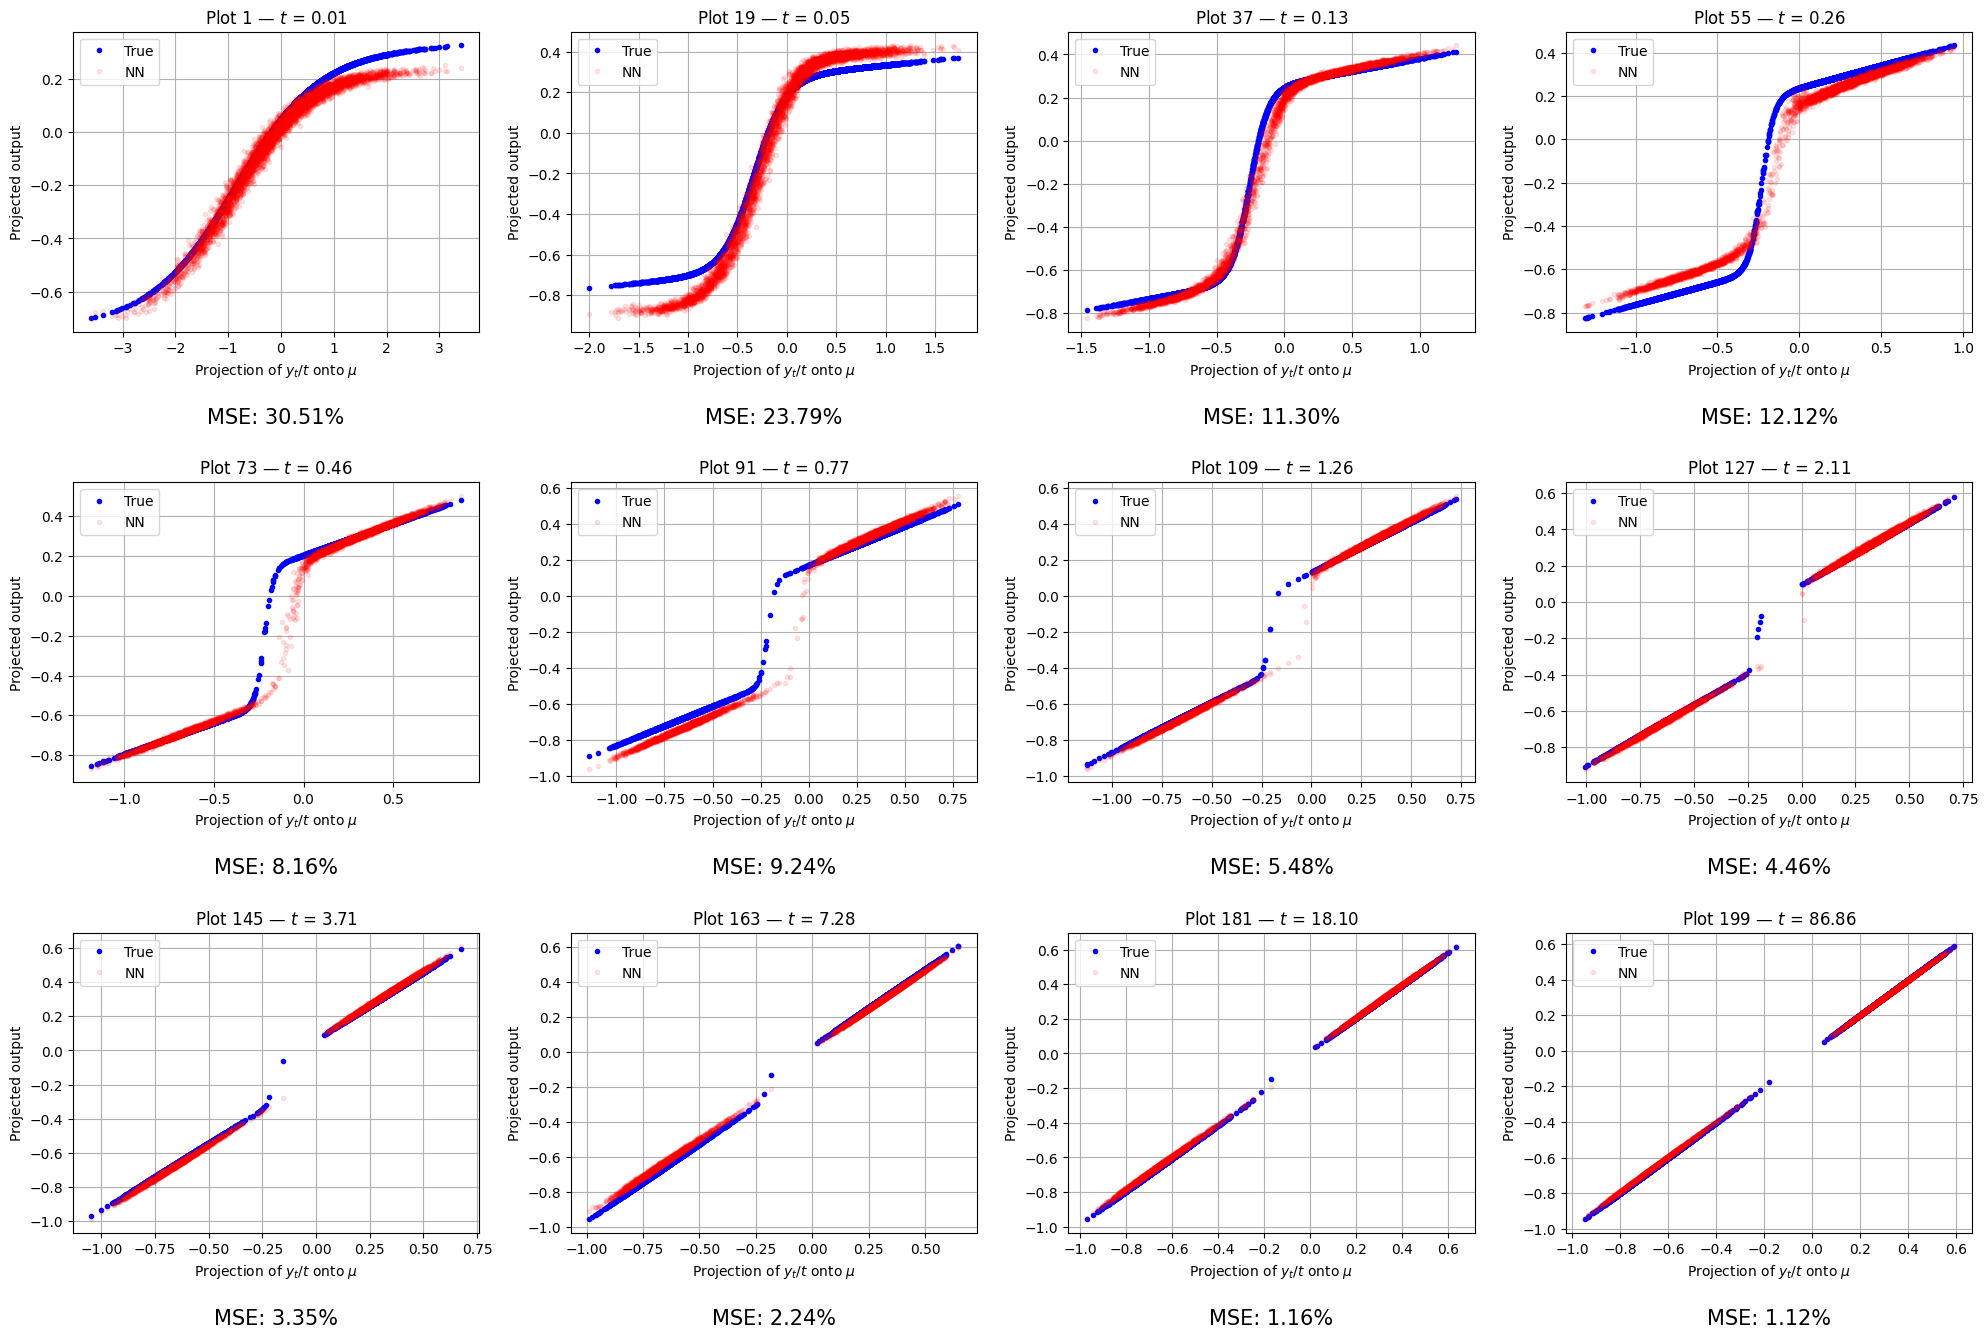

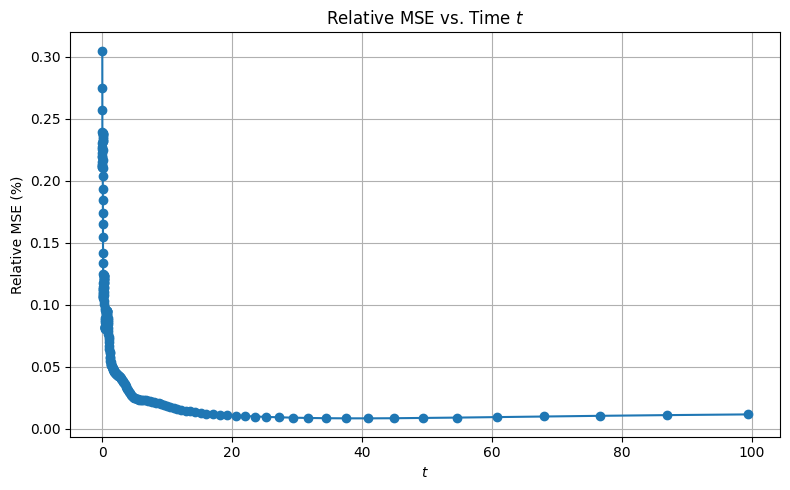

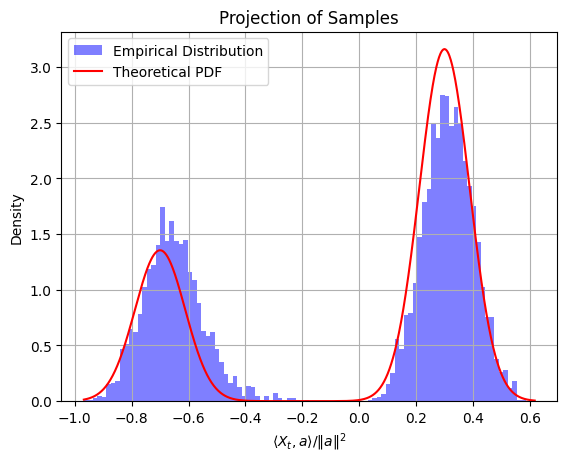

In [14]:
target_samples2 = forward_sampling(alpha_max, K, denoiser2, n, num_samples_target=5000, path=False)
evaluate_denoiser_on_gaussian_mixture(denoiser2, samples, plot_every=18)
plot_projected_dataset(target_samples2, a, p, n)